In [1]:
from pylabnet.hardware.awg.quantum_machine import Driver
from pylabnet.utils.logging.logger import LogClient
from configuration import config
from pylabnet.network.client_server import quantum_machine

# Note this may require special installs, but allows for convenient inline plot manipulation
# %matplotlib widget

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Run driver

In [4]:
dev_id = 'QM_ford'

# Instantiate Logger
# OPTIONAL, only if log server exists
# logger = LogClient(
#     host='192.168.50.101', 
#     port=38967,
#     module_tag=f'Quantum Machine {dev_id}'
#

qmm = Driver(
    dev_id,
#   logger=logger  
)

2022-03-23 15:32:02,200 - qm - INFO - Performing health check
2022-03-23 15:32:02,202 - qm - INFO - Health check passed


In [6]:
from qm.qua import program, infinite_loop_, play, wait

# programe
print('start...')
with program() as prog:
    with infinite_loop_():
        play('trigger', 'tt') 
        # play('X', 'e_spin')
        wait(100, 'tt')

job = qmm.execute(config, prog)

start...
2022-03-23 15:32:14,119 - qm - INFO - Flags: 
2022-03-23 15:32:14,120 - qm - INFO - Sending program to QOP
2022-03-23 15:32:14,138 - qm - INFO - Executing program


2022-03-23 15:01:06,657 - qm - INFO - Flags: 
2022-03-23 15:01:06,658 - qm - INFO - Simulating program


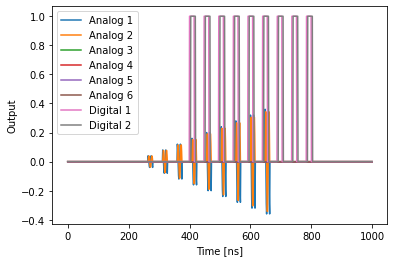

In [4]:
from qm.qua import program, declare, for_, reset_phase, amp, fixed
from qm.simulate import SimulationConfig

with program() as sim_test:
    a = declare(fixed)
    with for_(a, 0.1, a < 1, a + 0.1):
        reset_phase('e_spin')
        play('const' * amp(a), 'e_spin')

job, samples = qmm.simulate(config, sim_test, duration=250)

# plot all ports:
samples.con1.plot()

### Client

In [2]:
qmm_client =  quantum_machine.Client(
    host='192.168.50.111',
    port=27319
)

In [3]:
from qm.qua import program, infinite_loop_, play, wait, declare
import pickle 
# programe
print('start...')
with program() as prog:
    with infinite_loop_():
        play('trigger', 'tt') 
        # play('X', 'e_spin')
        wait(100, 'tt')

qmm_client.execute(config, pickle.dumps(prog) )

start...


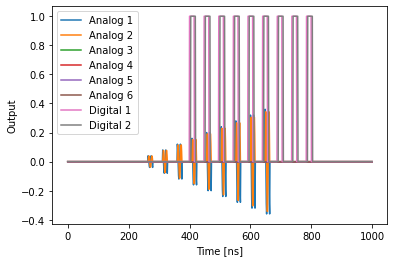

In [5]:
from qm.qua import program, declare, for_, reset_phase, amp, fixed


with program() as sim_test:
    a = declare(fixed)
    with for_(a, 0.1, a < 1, a + 0.1):
        reset_phase('e_spin')
        play('const' * amp(a), 'e_spin')


job, samples = qmm_client.simulate(config, pickle.dumps(sim_test), duration=250)

# plot all ports:
samples.con1.plot()